<a href="https://colab.research.google.com/github/SHIVA20-GUPTA/FlightPrice/blob/main/Cellphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Problem:- Create ML Model That Predict the price range of the mobile

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from numpy.testing import suppress_warnings

In [2]:
# loading the file
data=pd.read_csv('PRCP-1009-CellphonePrice dataset.zip',encoding='latin-1')

# 

## Basic checks

In [3]:
data.head() # top 5 rows 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.tail() # bottom 5 row

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
data.info() # check the data type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* Here, we see there is no categorical values and any columns contains null values

In [6]:
data.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [7]:
data.shape # chcek total rows and columns

(2000, 21)

. There are 2000 rows and 21 columns

In [8]:
data.columns # check the columns name

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
data.describe() #used to view some basic statistical details like mean ,percentile,e.t.c.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Introduction of Project

* TARGET COLUMNS= Price range
  * PRICE RANGE---> In Price range ,see the price of mobile.
  * PRICE RANGE "3" ---> The price range of mobile is  very high cost.
  * PRICE RANGE "2" ---> The price range of mobile is high cost.
  * PRICE RANGE "1" ---> The price range of mobile is medium cost.
  * PRICE RANGE "0" ---> The price range of mobile is low cost.
* What are we going to do in this project
   in this project we are going to analyse to how other features is effecting "attrition".

In [10]:
# check unique value in target variable 
data['price_range'].unique() 

array([1, 2, 3, 0])

## Exploratory Data Analysis

### Univariate analysis

In [11]:
!pip install sweetviz #automated library for visulization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 69.4 MB/s eta 0:00:00


In [12]:
import sweetviz as sv # library for univariated analysis
my_report=sv.analyze(data)#pass the original dataframe
my_report.show_html()#Default arguments will generate to "Sweetviz Report"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from Univariate analysis
* The enegry is stored a battery 500-2000mAh b/w 8 to 12%.
* Percentage Distribution of mobiles having bluetooth,dual sim,4G,wifi and touch screen are alomost 50%.
* Target variable has equal number of observations in each category. Target variable is equally distributed.

# Bivariate analysis

### Plotting Relation between Price Range & RAM

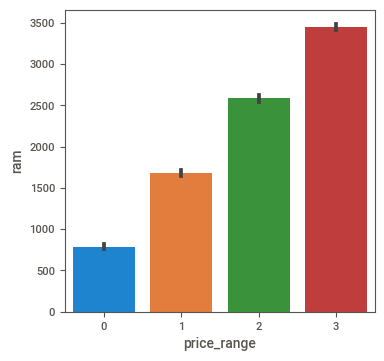

In [13]:
plt.figure(figsize=(4,4))
sns.barplot(x='price_range',y='ram',data=data)
plt.show()

## Observation:
* We see ram is affecting the price range. We are increaing the TRAM, price of the device will also increase.
* RAM is directly propotional to price range

### Plotting Relation between Price Range & Battery Power

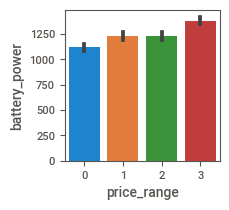

In [14]:
plt.figure(figsize=(2,2))
sns.barplot(x='price_range',y='battery_power',data=data)
plt.show()

* See,high range of phone has good battery power.

### Plotting reation Between Price Range & pixel Height/width

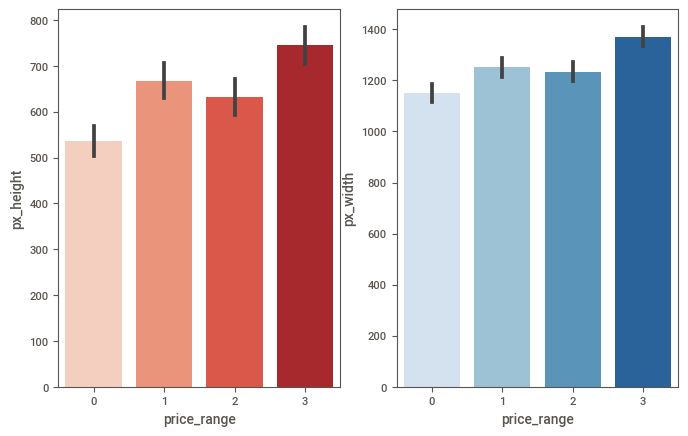

In [15]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=data,palette='Reds')
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=data,palette='Blues')
plt.show()

* High range phones having high pixel heights and low range phone having low pixels height.
* More the price more the pixel width and less the price less pixel width.

### Plotting Relation between Price Range & 3G/4G

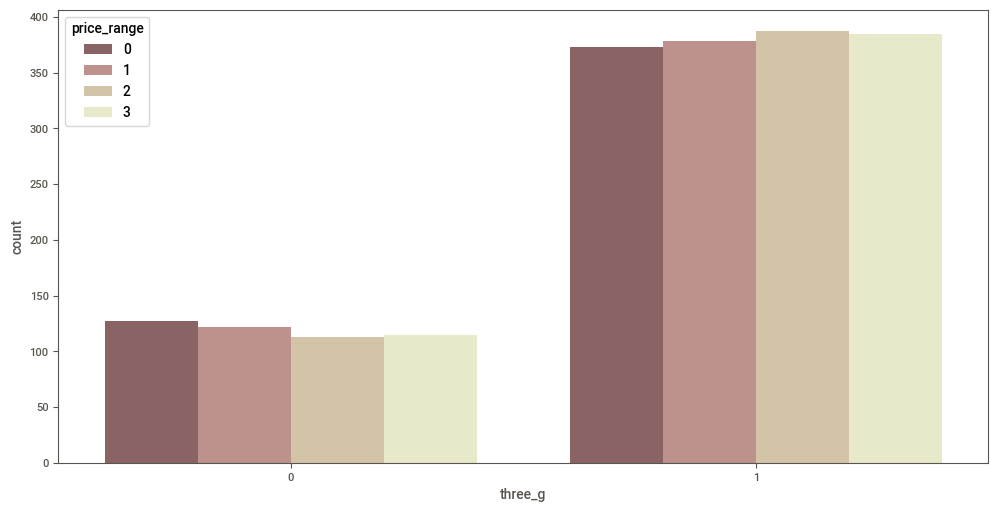

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data['three_g'],hue=data['price_range'],palette='pink')
plt.show()

* We see ,mostly 3g facility phone belongs medium to lower price range.

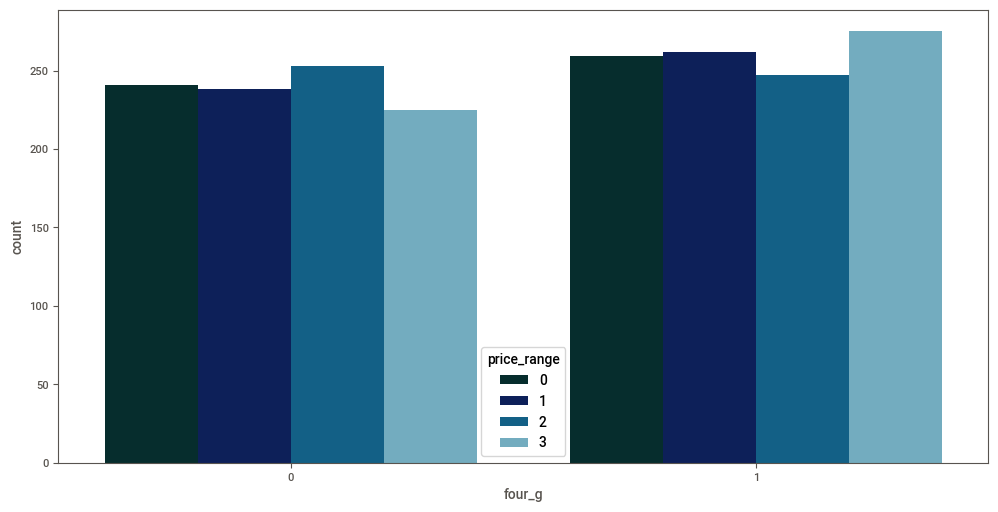

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data['four_g'],hue=data['price_range'],palette='ocean')
plt.show()

*  The  mobile 4g belongs to  means they are costly (high price range. 4g facility impact on increasing manufacturing cost.

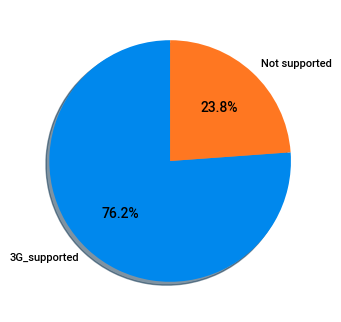

In [18]:
labels3g=["3G_supported","Not supported"]
values=data['three_g'].value_counts().values
fig1, ax1=plt.subplots()
ax1.pie(values, labels=labels3g,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

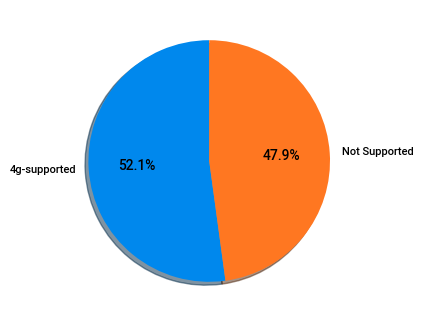

In [19]:
# %  OF PHONE WHICH SUPPORTED 4G
labels4g=["4g-supported",'Not Supported']
values4g=data['four_g'].value_counts().values
fig1, ax1=plt.subplots()
ax1.pie(values4g,labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Plotting Relation Between Price Range & Memory

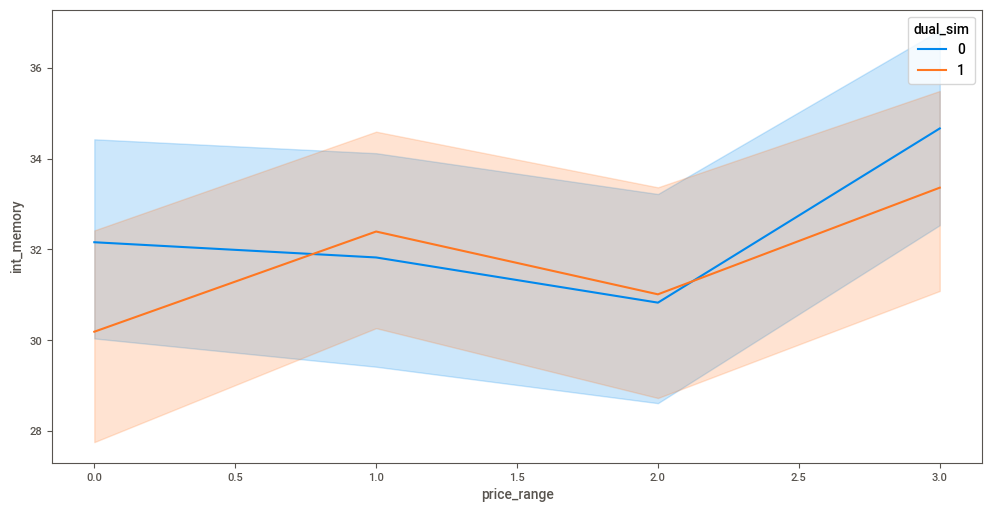

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x='price_range',y='int_memory',data=data,hue='dual_sim')
plt.show()

#### Dual sim
*  Cheapest phone have lower memory.
*  Costly phone has higher memory
##### Not having dual sim
* Cheapest phone not having dual sim compare to dual sim having good memory.

### Multivariate analyzing

## Final observation
* Those phone have min battery power(500 mAh) that price range are less compare to 2000mAh.
* Expensive phone has higher RAM size.
* 4G  are affected 52.1% price range and 3g is 76.2%
* Higher price range phone have best quality camrera pixel.
* Screen size is less affecting phone price range but width more affect the price range

## Data preprocessing

In [21]:
# To check null value
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* No null values

In [22]:
# Convert Categorical value into numerical:- no categorical value

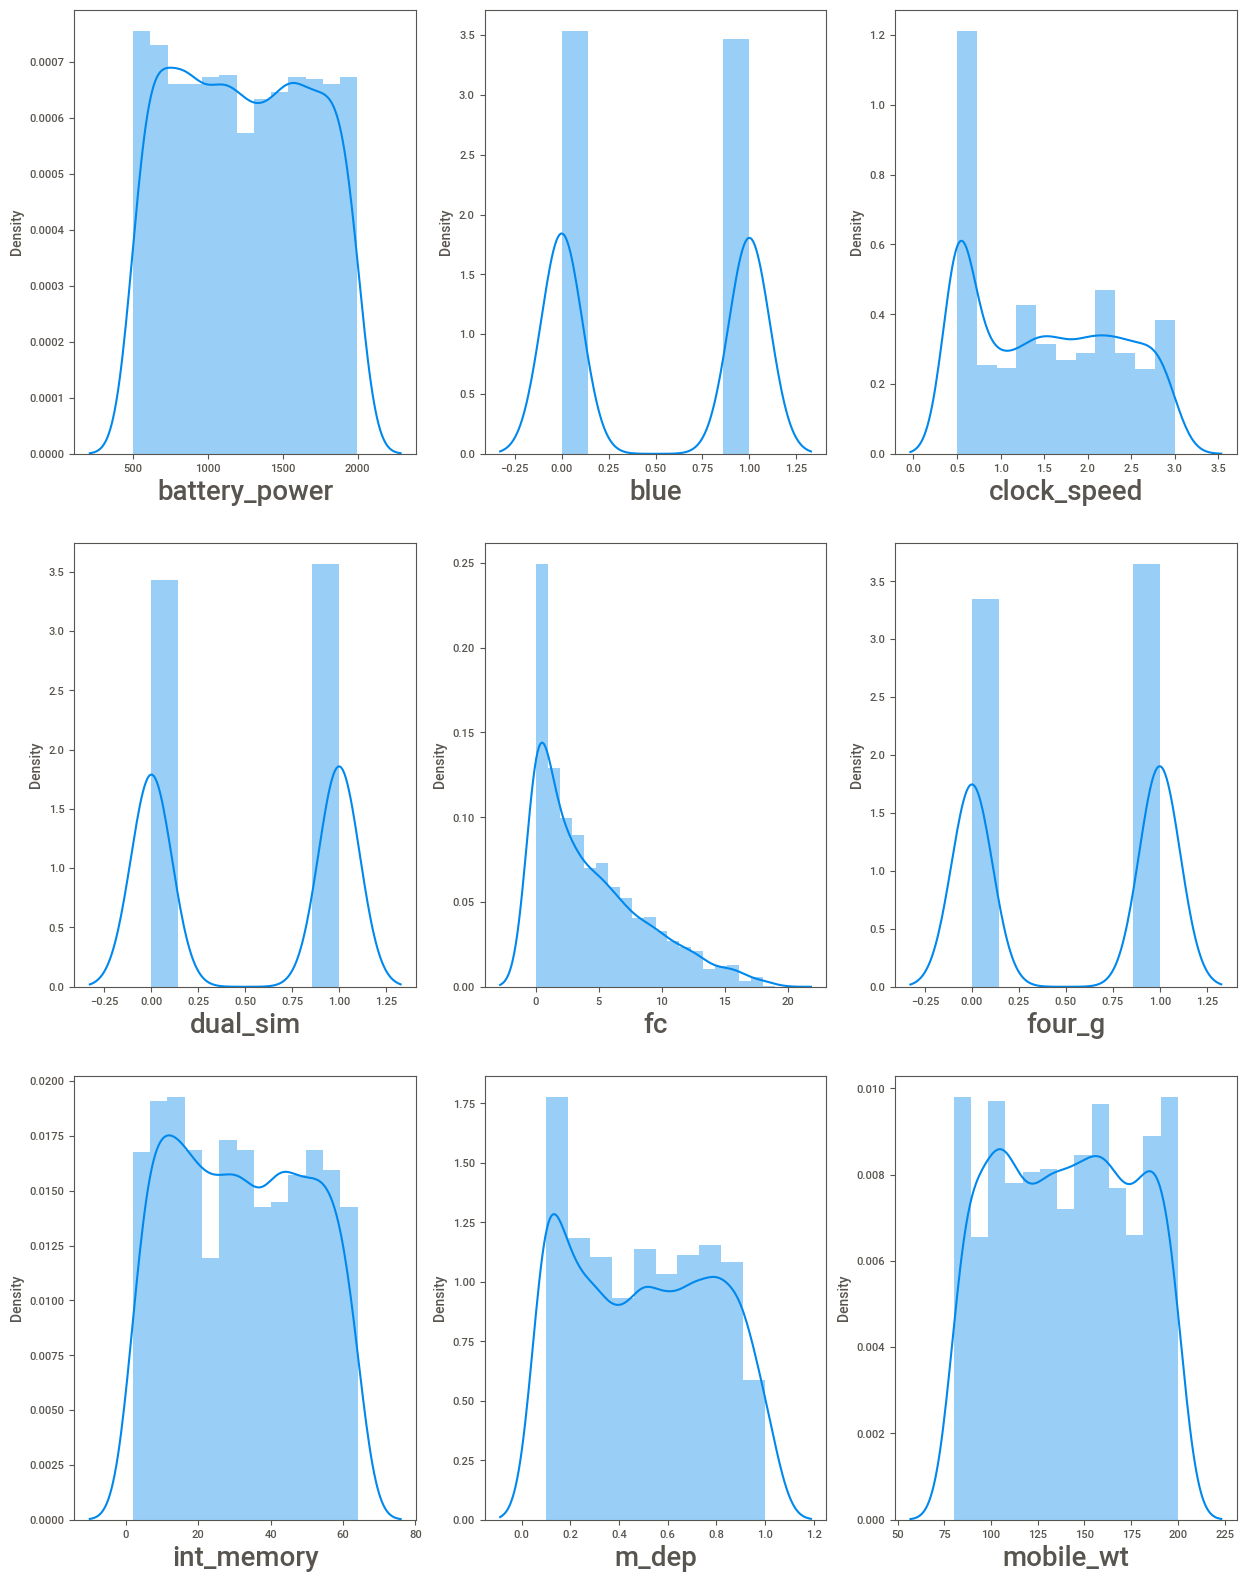

In [23]:
# let's see how our data is distributed for every column 
plt.figure(figsize=(15,20),facecolor='white') # defining canvas size
plotnumber=1 #maintain the count graph

for column in data:
    if plotnumber<=9: # As there are 9 column in the data
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    
    plotnumber+=1
plt.show()
        

* Bluetooth, 4g,dual sim are properly normally distributed
* mobile wt,battrey power,int memory are mostly normally distributed 
* fc(frequency),clockspeed, and m dep are right skewness ---> no need to convert in normal distribution.

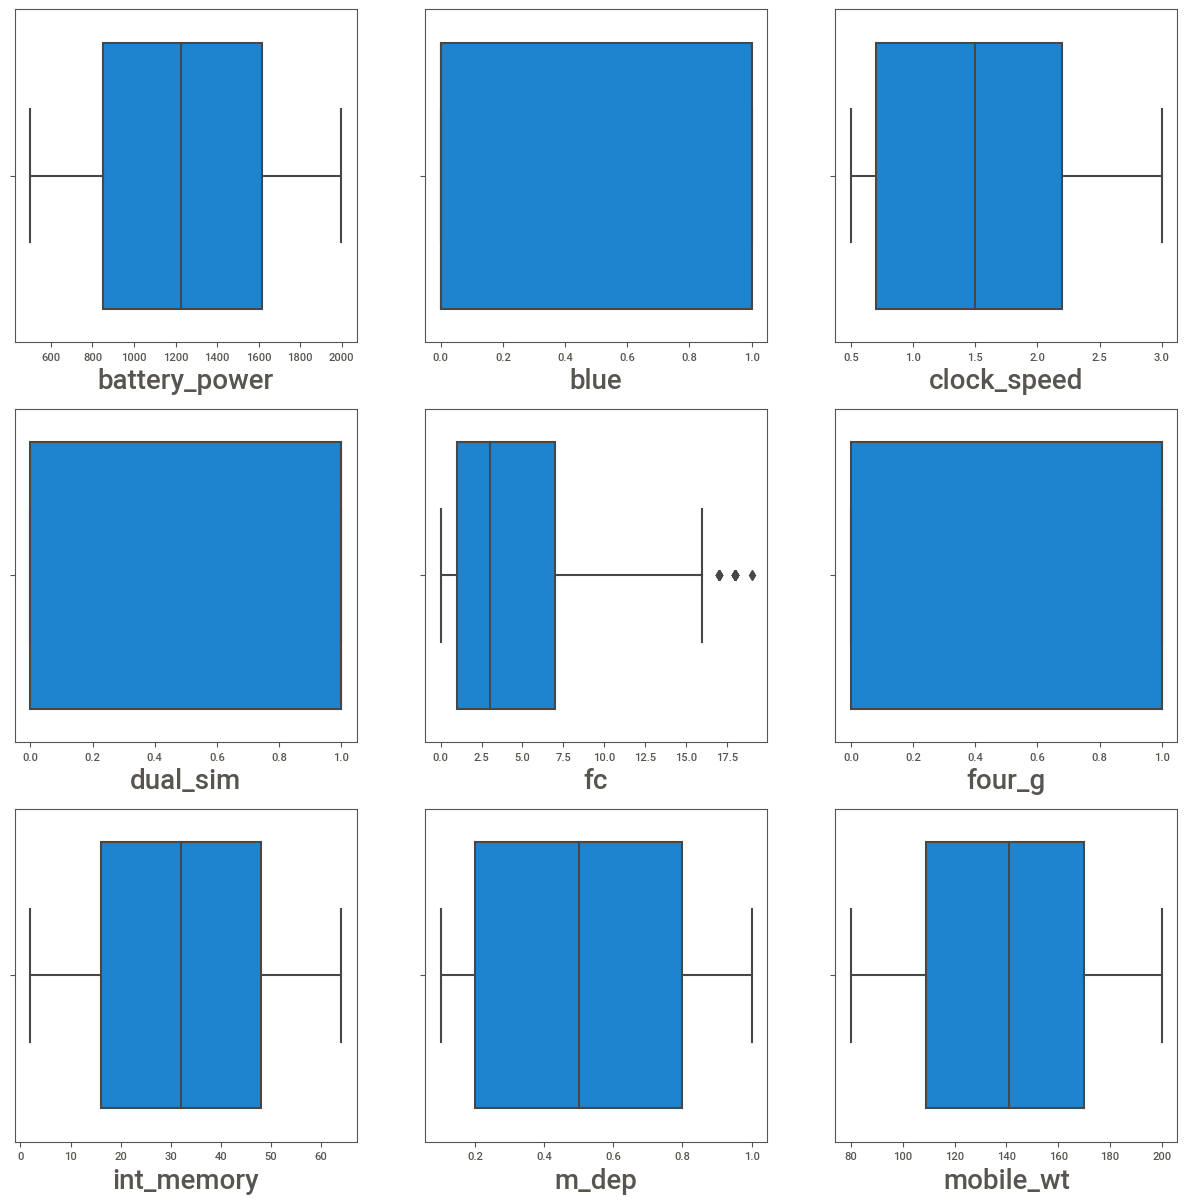

In [24]:
# Handling outliers
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

* The outliers is present in frequency.so we need to remove it.

## Using 3 Standard deviation rule to detect  the outliers

In [25]:
upper_limit=data.fc.mean()+3*data.fc.std()
upper_limit

17.333831243951682

In [26]:
lower_limit=data.fc.mean()-3*data.fc.std()
lower_limit

-8.714831243951682

In [27]:
len(data.loc[data['fc']<lower_limit])  # less than the lower limit

0

In [28]:
len(data.loc[data['fc']>upper_limit])

12

In [29]:
# Size of dataset
data.shape[0] #3500
#size of data which are outliers
len(data.loc[data['fc']>upper_limit ]) # 20
# % of data ouliers
20/3500*100
# if outliers percentage is greater than 5% then no  treatment

0.5714285714285714

In [30]:
data.loc[data['fc']>upper_limit]=data['fc'].median()

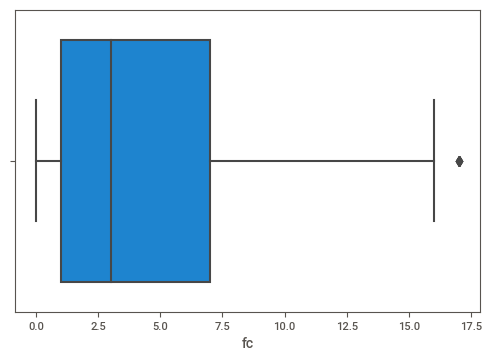

In [31]:
sns.boxplot(x='fc',data=data)
plt.show()

## Feature selection

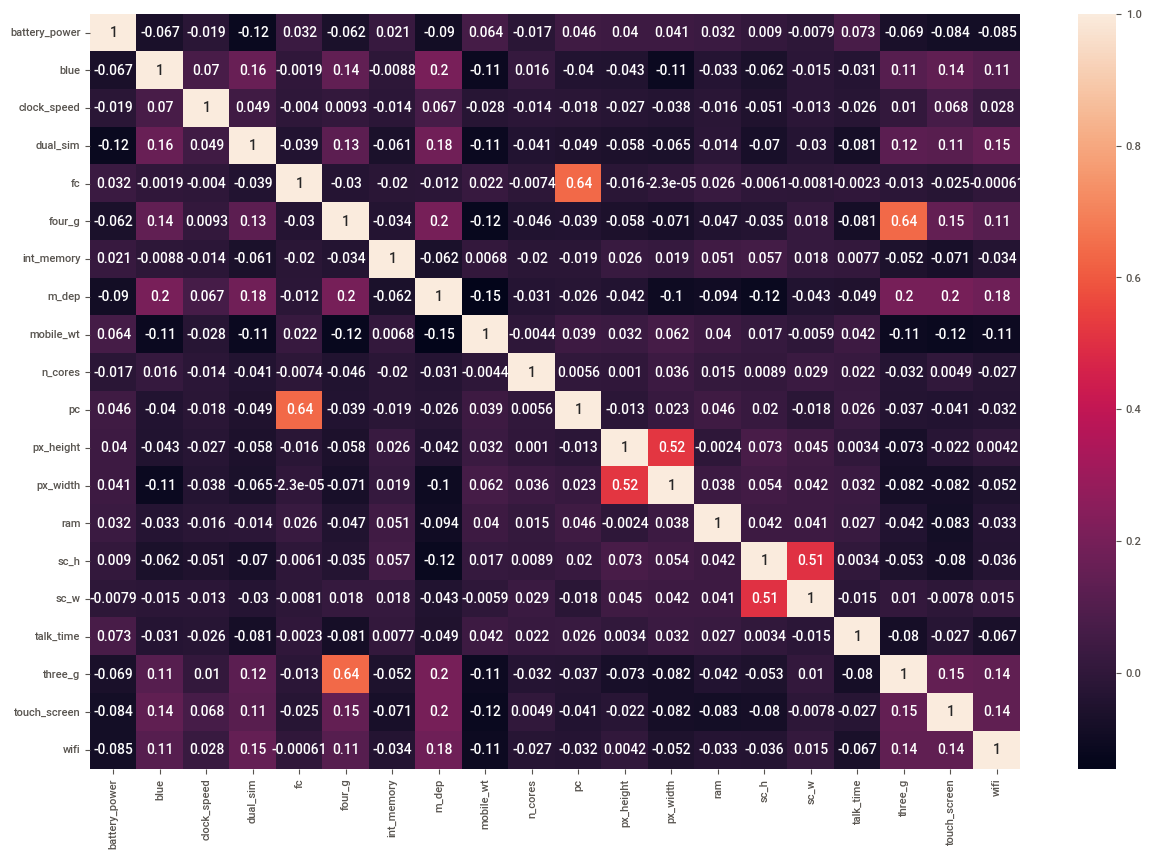

In [32]:
# Checking Correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.drop('price_range',axis=1).corr(),annot=True) # Checking for correlation
plt.show()

In [33]:
# Check duplicate values 
data.duplicated().sum()

11

In [34]:
# drop duplicate values
data.drop_duplicates().inplace=True

In [35]:
X=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [36]:
X[0]

array([8.420e+02, 0.000e+00, 2.200e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       7.000e+00, 6.000e-01, 1.880e+02, 2.000e+00, 2.000e+00, 2.000e+01,
       7.560e+02, 2.549e+03, 9.000e+00, 7.000e+00, 1.900e+01, 0.000e+00,
       0.000e+00, 1.000e+00])

In [37]:
y[0]

1

## Model Building

In [38]:
#Defining Independent and dependent variable
X=data.drop(columns=['price_range']) # independent variable
y=data['price_range'] # dependent or target variable

In [39]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [40]:
# balance the data
from collections import Counter # importing counter to check count of each label
from imblearn.over_sampling import SMOTE # for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# Checking count for each class
X_sm,y_sm=sm.fit_resample(X,y)#applying sampling on target variable
print(Counter(y_sm))# Checking count after sampling for each class

Counter({3: 510, 1: 497, 2: 497, 0: 496})
Counter({1: 510, 2: 510, 3: 510, 0: 510})


In [41]:
# Spliting input data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [42]:
X_train.shape

(1600, 20)

In [43]:
X_test.shape

(400, 20)

In [44]:
# Standardzation makes all the 'features' value in particular range (0-1)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)# first fit the data and then apply
X_test=std.transform(X_test)


In [45]:
X_train

array([[ 1.53455472, -0.94164417, -1.23792737, ...,  0.48070201,
         0.88667721,  0.90129643],
       [-1.32706769,  0.91153009,  0.81735094, ...,  0.48070201,
         0.88667721,  0.90129643],
       [ 0.01057442, -0.94164417, -0.75433248, ...,  0.48070201,
        -0.96781107,  0.90129643],
       ...,
       [ 1.3260334 ,  0.91153009, -1.23792737, ...,  0.48070201,
        -0.96781107,  0.90129643],
       [ 1.54342797, -0.94164417, -0.75433248, ..., -1.67975645,
         0.88667721,  0.90129643],
       [-1.32263106,  0.91153009, -1.11702865, ...,  0.48070201,
        -0.96781107, -0.9522695 ]])

In [46]:
X_test

array([[ 0.92008231, -0.94164417,  1.18004711, ...,  0.48070201,
         0.88667721, -0.9522695 ],
       [-0.10921443, -0.94164417, -1.23792737, ...,  0.48070201,
        -0.96781107, -0.9522695 ],
       [ 1.64325201, -0.94164417,  1.663642  , ...,  0.48070201,
         0.88667721, -0.9522695 ],
       ...,
       [-0.41534148, -0.94164417,  0.33375604, ...,  0.48070201,
         0.88667721,  0.90129643],
       [-1.11632805, -0.94164417,  1.42184456, ...,  0.48070201,
         0.88667721,  0.90129643],
       [-0.10255949, -0.94164417,  0.45465476, ...,  0.48070201,
         0.88667721,  0.90129643]])

# Model Creation

In [47]:
# import algorithm :- linear Regression Model 
from sklearn.linear_model import LinearRegression
lr=LinearRegression() # Creating object
lr.fit(X_train,y_train) # Train the Algorithm

LinearRegression()

In [48]:
lr.coef_ #model learn values (B1,B2,B3...)

array([ 0.19415809,  0.06510255,  0.01451884,  0.0471205 ,  0.00976753,
        0.02442765, -0.00613646,  0.12332083, -0.08387178, -0.00515894,
       -0.01247488,  0.12127117,  0.08253664,  1.0060946 , -0.0220449 ,
        0.0070835 , -0.0090753 ,  0.06490445,  0.05893401,  0.05980584])

In [49]:
lr.intercept_

1.5049999999999997

In [50]:
y_pred=lr.predict(X_test) # Predict values

In [51]:
y_test # Actual values

1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

In [52]:
y_pred # predicted value

array([ 2.12259339e-01,  1.53385409e+00,  7.10747630e-01,  2.77451535e+00,
        1.28400273e+00,  1.35685935e+00,  1.58177644e+00,  2.61838340e-01,
        2.71830493e+00,  1.48578135e+00,  4.92337110e-01,  5.58751162e-01,
        2.12953686e+00,  3.05424863e+00,  2.28642020e+00,  2.02713369e+00,
        3.19212773e+00,  3.32071840e+00,  1.32546521e+00, -4.86285891e-02,
       -6.17687807e-03,  1.39713327e+00,  4.47474712e-01,  1.67839037e+00,
        1.98075340e-01,  7.50292653e-01,  2.67732478e+00,  2.41286234e+00,
        1.95063265e+00, -3.01862173e-01,  7.93132712e-01, -2.27297834e-02,
        3.28444196e+00,  1.95960510e-01,  1.03072505e+00,  1.59092017e+00,
        2.05905457e+00,  7.14271701e-01,  3.14371822e+00,  2.44816588e-01,
        1.46946437e+00,  2.64188045e+00,  1.52250104e+00,  1.26923224e-01,
        2.46911619e+00,  2.27284468e+00,  1.96799022e+00,  7.85338627e-01,
        3.19873604e+00,  1.26022347e+00,  3.07086771e+00,  1.05307641e+00,
        2.63172898e-01,  

In [53]:
lr.score(X_test,y_test) # to check the accurarcy score the model

0.8824635524157896

 ## Model Evalution

In [54]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [55]:
r2score=r2_score(y_test,y_pred)
r2score # To check the model accurarcy :- 0 is worst & 1 is good ,-ve is most worst model

0.8824635524157896

In [56]:
# Calculating of adjusted r2 score
adjusted_r2=1-(1-0.88)*(40-20)/(40-20-1)
adjusted_r2

0.8736842105263158

In [57]:
print(mean_squared_error(y_test,y_pred)) # To check the (actual value or predicted value) error of model 
print(np.sqrt(mean_squared_error(y_test,y_pred))) #root mean squared error

0.15737469189008116
0.3967047918668001


In [58]:
print(mean_absolute_error(y_test,y_pred))# check the (absolute difference)distance b/w pred & actual observation. The less distance means model is good

0.32270216392967965


## KNN Model

In [59]:
## taking optimal k to determine how many nearest neighbors to create
from sklearn.neighbors import KNeighborsClassifier
# Create a list to store the error values for each k
error_rate=[]

for i in range (1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [60]:
knn=KNeighborsClassifier(n_neighbors=5) # modelcreate
knn.fit(X_train,y_train) # train the model

KNeighborsClassifier()

In [61]:
knn.score(X_test,y_test) # to check the score

0.53

Text(0, 0.5, 'Error Rate')

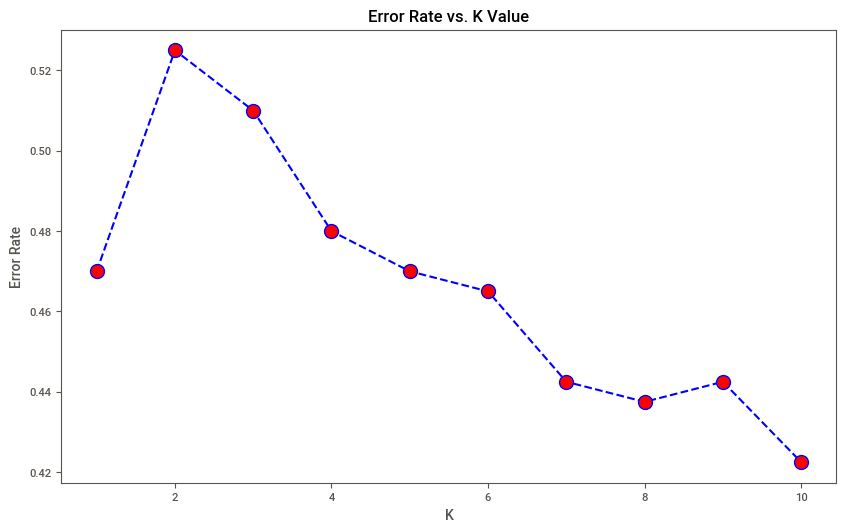

In [62]:
# Lets plot the k-value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
#  let's fit the data into KNN model and see how well it performs:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)# predict
y_pred=knn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score,classification_report

In [65]:
# Checking accuracy score
print('The Accuracy score is: ',accuracy_score(y_test,y_pred))

The Accuracy score is:  0.5775


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75       105
           1       0.41      0.43      0.42        90
           2       0.38      0.43      0.41        92
           3       0.81      0.62      0.70       113

    accuracy                           0.58       400
   macro avg       0.58      0.57      0.57       400
weighted avg       0.60      0.58      0.58       400



In [67]:
knn.score(X_train,y_train)

0.685

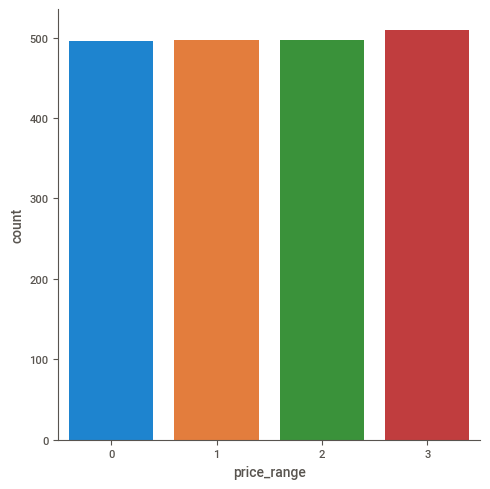

In [68]:
## Checking the balance of target
sns.catplot(x='price_range',data=data,kind='count')

## SVM Model

In [69]:
from sklearn.svm import SVC # import SVC algorithm
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [70]:
y_pred_classifier=svm.predict(X_test)

In [71]:
print("The accurarcy score is: ",accuracy_score(y_test,y_pred_classifier))

The accurarcy score is:  0.895


In [72]:
print(classification_report(y_test,y_pred_classifier))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.91      0.85        90
           2       0.86      0.80      0.83        92
           3       0.96      0.92      0.94       113

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree classfier from sklearn tree
dt=DecisionTreeClassifier() #object creation for decision tree
dt.fit(X_train,y_train) #Training the model

DecisionTreeClassifier()

In [74]:
y_hat=dt.predict(X_test)#prediction
y_hat# predicated values

array([0, 2, 1, 3, 1, 1, 2, 0, 2, 1, 0, 1, 1, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 2, 1, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 3, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 3, 2, 1, 3, 3, 1, 3, 1, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 0, 1, 2, 3, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 1, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 1, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 3, 0, 3, 3, 0, 3, 3, 3, 2, 3, 0, 1, 2,
       2, 1, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 3, 3, 3, 3, 0, 0, 0, 1, 3, 3,

In [75]:
y_train_predict=dt.predict(X_train) #predicting training data to check training performance
y_train_predict

array([1, 2, 0, ..., 2, 3, 1])

In [76]:
# Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score #importing mertics
# training score
y_train_predict=dt.predict(X_train)#passing X_train to predict y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

1.0

In [77]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1,2,3
price_range,,,,
0,391,0,0,0
1,0,407,0,0
2,0,0,405,0
3,0,0,0,397


In [78]:
# test accuracy
test_acc=accuracy_score(y_test,y_hat)#testing accuracy
test_acc

0.8375

In [79]:
print(classification_report(y_test,y_hat)) #it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       105
           1       0.76      0.83      0.79        90
           2       0.78      0.75      0.76        92
           3       0.88      0.88      0.88       113

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



In [80]:
dt.score(X_test,y_test)

0.8375

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier#importing random forest
rf_clf=RandomForestClassifier(n_estimators=100)#object creation,taking 100 desicion tree
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [82]:
y_predict=rf_clf.predict(X_test)#testing

In [83]:
rf_clf.score(X_test,y_test)

0.8925

## Gradient boosting classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier# importing gradient boosting
gbm=GradientBoostingClassifier()# object the algorithm
gbm.fit(X_train,y_train)# fit the model

GradientBoostingClassifier()

In [85]:
y_gbm=gbm.predict(X_test)#predict the model

In [86]:
y_gbm_train=gbm.predict(X_train)

In [87]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.9075

## Conclusion

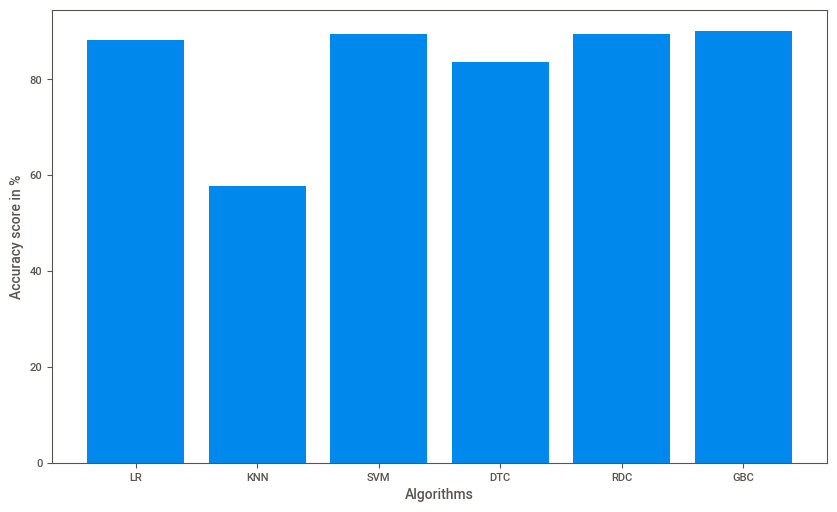

In [88]:
dict_sc_algo={'LR':88.2,'KNN':57.75,"SVM":89.5,'DTC':83.5,'RDC':89.5,'GBC':90}
algo=list(dict_sc_algo.keys())
score=list(dict_sc_algo.values())
plt.figure(figsize=(10,6))
plt.bar(algo,score)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score in %')
plt.show()

* Model to be used :
   * When we are applying the above  algorithms, we get almost the same result in terms of accuracy except knn. The best among them for this project is the gradient boosting classifier as in this price prediction project, checking the correctness and accuracy of our assumptions in prediction & building our Machine Learning model is most important and this algorithm will be the best as it will reduce or we can say minimize the bias error (the errors that may be caused due to our wrong assumptions while building our model)
* Challenges : 
   * The challenges in this data set were as per us that if there would have been specific information reagrding the target audience based on their earning/spending capacity we could have also predicted from the data set the market segment(target audience)which we can go for as this will importantly help us to price our product at more accuarte price range. This can also be overcomed by better Domain analysis and target segmentation.
* Suggestions :
   * In addition to the above data inferences throughout our ML Model, we suggest that BOB's company should price the product between range of 1 (assuming this is medium priced) to 2 (assuming this is highprice range) beacause they want to specifically compete with companies like Apple & Samsung, so the quality of specification and built quality of there device should be above or atleast at par with them in order to compete. So having these specifications of high quality will have cost effect of the manufacturing of the device.Also they can't afford to keep the price of the cell phones in the lower range as they entering into premium phone segment.They can keep the prices somewhat less than what Samsung & Apple are offering at the moment but should give their customers a edge on features and use. This was one startegy opted by ONE PLUS and they are still succesfully competing with both Apple & Samsung at a bit lower price but are still in the premium phone segment.

In [89]:
import joblib
joblib.dump(GradientBoostingClassifier,"hp_model.ml")

['hp_model.ml']